# Analysis of The Programme for International Student Assessment (PISA) Program [application on 2012 dataset]


## data description and project overview

### What is the Pisa Programme?

"The Programme for International Student Assessment (PISA) is an international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students who are nearing the end of their compulsory education in the key subjects: reading, mathematics and science.This survey gives us insights into how the students' background and school environment could influence their performance."
  
Source: [Pisa Programme Description](http://www.oecd.org/pisa/aboutpisa/ "OECD Homepage")

### Pisa 2012

"PISA 2012 is the programme’s 5th survey. 
* It assessed the competencies of 15-year-olds in reading, mathematics and science.
* covered 65 countries and economies. 
* surveyed 510 000 students.
* age group [15 years and 3 months :  16 years 2 months] 
  
Source: [Pisa 2012 Survey Description](http://www.oecd.org/pisa/aboutpisa/pisa-2012-results.htm "OECD Homepage")

## Import libraries

In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
%matplotlib inline
import numpy as np
import seaborn as sns 

In [8]:
# due to the large number of columns [>600], we made a limit of 700 columns in order to capture all of them
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)

## read the Data

to follow along, you need to download your own version of the data to work on it from those links 

1. https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip 
2. https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv

In [10]:
# let's import the dataset
pisa_2012 = pd.read_csv(r"C:\Users\nahla\Downloads\Nanodegree Deadline\pisa data\pisa2012.csv",encoding='latin-1', low_memory = False)

In [11]:
#import the column descriptions accordingly
pisa_2012_dict = pd.read_csv(r"C:\Users\nahla\Downloads\Nanodegree Deadline\pisa data\pisadict2012.csv", 
                        encoding='latin-1', low_memory = False)

## Data Investigation

overview on the sample data

In [12]:
pisa_2012.sample(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

check the table columns

In [52]:
pisa_2012.columns

Index(['Unnamed: 0', 'CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC', 'SCHOOLID',
       'STIDSTD', 'ST01Q01', 'ST02Q01',
       ...
       'W_FSTR75', 'W_FSTR76', 'W_FSTR77', 'W_FSTR78', 'W_FSTR79', 'W_FSTR80',
       'WVARSTRR', 'VAR_UNIT', 'SENWGT_STU', 'VER_STU'],
      dtype='object', length=636)

So we have results for: 
* 485.490 children.
* age [between 15 years 3 months and 16 years 2 months]
* the children are from multiple countries
* there are 636 columns
* dataset is greater than 2.5 GB
* the number of participants vary across different countries

In [14]:
pisa_2012.groupby('NC')['CNT'].count()

NC
Albania                             4743
Argentina                           5908
Australia                          14481
Austria                             4755
Belgium                             8597
Brazil                             19204
Bulgaria                            5282
Canada                             21544
Chile                               6856
China (Shanghai)                    5177
Chinese Taipei                      6046
Colombia                            9073
Costa Rica                          4602
Croatia                             5008
Czech Republic                      5327
Denmark                             7481
Estonia                             4779
Finland                             8829
France                              4613
Germany                             5001
Greece                              5125
Hong Kong-China                     4670
Hungary                             4810
Iceland                             3508
Indonesia    

investigating dict file

In [15]:
pisa_2012_dict

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code
5,SCHOOLID,School ID 7-digit (region ID + stratum ID + 3-...
6,STIDSTD,Student ID
7,ST01Q01,International Grade
8,ST02Q01,National Study Programme
9,ST03Q01,Birth - Month


dictionary file is vital to understand the data and start wranging it 

### Key Questions
 
* performance of the students on different subjects (Math, Reading and Science)? 
* calculate the score for each subject and student[based on the mean value of the computed values (1 to 5)]
* Does country has an impact on the students performance?
* Does Gender has an impact on the results?
* Does the internet performance has an impacat on the students results?


## Data Wrangling

in this step we clean the data

In [112]:
# limit the dataset to the columns we actually need to answer our questions
pisa_2012_clean = pisa_2012[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 
                       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
                       'PV5SCIE', 'ST26Q06']]

In [113]:
pisa_2012_clean

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,ST26Q06
0,Albania,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,No
1,Albania,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Yes
2,Albania,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Yes
3,Albania,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Yes
4,Albania,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,1996,Female,15.83,477.1849,493.5426,479.5217,486.5322,494.3215,460.2272,476.1134,472.9362,472.1419,481.6736,559.8098,528.1052,519.7128,535.5651,538.3626,No
485486,Vietnam,1996,Male,16.17,518.9360,515.8202,505.6940,596.8297,508.8098,490.9325,479.7053,448.4294,565.5134,451.6372,538.7355,493.9761,493.0436,561.1153,535.0056,Yes
485487,Vietnam,1996,Male,15.83,475.2376,482.2480,507.9530,457.3220,508.7319,462.6239,514.7503,434.5558,457.8122,511.5425,536.8706,571.3726,488.3812,548.9929,563.9127,No
485488,Vietnam,1996,Male,15.83,550.9503,517.4560,529.1401,515.8981,501.0983,505.2873,522.1282,513.3068,528.5437,522.9301,511.0407,532.4879,524.0955,551.1376,514.7706,Yes


In [114]:
#get the info about the new clean data
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CNT      485490 non-null  object 
 1   ST03Q02  485490 non-null  int64  
 2   ST04Q01  485490 non-null  object 
 3   AGE      485374 non-null  float64
 4   PV1MATH  485490 non-null  float64
 5   PV2MATH  485490 non-null  float64
 6   PV3MATH  485490 non-null  float64
 7   PV4MATH  485490 non-null  float64
 8   PV5MATH  485490 non-null  float64
 9   PV1READ  485490 non-null  float64
 10  PV2READ  485490 non-null  float64
 11  PV3READ  485490 non-null  float64
 12  PV4READ  485490 non-null  float64
 13  PV5READ  485490 non-null  float64
 14  PV1SCIE  485490 non-null  float64
 15  PV2SCIE  485490 non-null  float64
 16  PV3SCIE  485490 non-null  float64
 17  PV4SCIE  485490 non-null  float64
 18  PV5SCIE  485490 non-null  float64
 19  ST26Q06  473182 non-null  object 
dtypes: float64(16), int64(1), 

Now, in order to clean the data we want to replace the NaN values for the age of a student by the mean age in the whole data base

In [115]:
# replace missing age values with the mean age in the dataset
pisa_2012_clean.loc[np.isfinite(pisa_2012_clean['AGE']) == False, 'AGE'] = pisa_2012_clean['AGE'].mean()

C:\Users\nahla\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [116]:
# next cleaning step of NaN values in the ST26Q06 (Internet Access) column
pisa_2012_clean['ST26Q06'].value_counts()

Yes    402040
No      71142
Name: ST26Q06, dtype: int64

We replace the NaN values with the string 'Unknown'.

In [117]:
pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'].isna() == True,'ST26Q06'] = 'Unknown'

C:\Users\nahla\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [118]:
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CNT      485490 non-null  object 
 1   ST03Q02  485490 non-null  int64  
 2   ST04Q01  485490 non-null  object 
 3   AGE      485490 non-null  float64
 4   PV1MATH  485490 non-null  float64
 5   PV2MATH  485490 non-null  float64
 6   PV3MATH  485490 non-null  float64
 7   PV4MATH  485490 non-null  float64
 8   PV5MATH  485490 non-null  float64
 9   PV1READ  485490 non-null  float64
 10  PV2READ  485490 non-null  float64
 11  PV3READ  485490 non-null  float64
 12  PV4READ  485490 non-null  float64
 13  PV5READ  485490 non-null  float64
 14  PV1SCIE  485490 non-null  float64
 15  PV2SCIE  485490 non-null  float64
 16  PV3SCIE  485490 non-null  float64
 17  PV4SCIE  485490 non-null  float64
 18  PV5SCIE  485490 non-null  float64
 19  ST26Q06  485490 non-null  object 
dtypes: float64(16), int64(1), 

after cleaning the data, there is now no NAN values, its now ready for visualization and further analysis

second step would be summing up the 5 values for each subject and divide them by 5 to get the mean, so that we could the output results in a another column

In [119]:
# STEP 1: calculate the mean performance for each student in a specific subject and store it in a separate column
pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE']
                              + pisa_2012_clean['PV4SCIE'] + pisa_2012_clean['PV5SCIE']) / 5
pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH']
                           + pisa_2012_clean['PV4MATH'] + pisa_2012_clean['PV5MATH']) / 5
pisa_2012_clean['Reading'] = (pisa_2012_clean['PV1READ'] + pisa_2012_clean['PV2READ'] + pisa_2012_clean['PV3READ']
                              + pisa_2012_clean['PV4READ'] + pisa_2012_clean['PV5READ']) / 5


<ipython-input-119-4ec2133b58e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE']
<ipython-input-119-4ec2133b58e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH']
<ipython-input-119-4ec2133b58e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [120]:
#STEP 2: change column types to float
pisa_2012_clean['Science']=pisa_2012_clean['Science'].astype(float)
pisa_2012_clean['Mathematics']=pisa_2012_clean['Mathematics'].astype(float)
pisa_2012_clean['Reading']=pisa_2012_clean['Reading'].astype(float)

<ipython-input-120-0abaea41ced9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_2012_clean['Science']=pisa_2012_clean['Science'].astype(float)
<ipython-input-120-0abaea41ced9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_2012_clean['Mathematics']=pisa_2012_clean['Mathematics'].astype(float)
<ipython-input-120-0abaea41ced9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

#### Data Cleansing

Now drop all not needed columns for data cleansing

In [121]:
# all the columns used to get the mean are irrelevant now
pisa_2012_clean.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ',
                          'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 
                          'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

C:\Users\nahla\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [122]:
# add a business value to the column names
pisa_2012_clean.rename({'CNT' : 'Country', 
                  'ST03Q02' : 'Year Of Birth', 
                  'ST04Q01' : 'Gender', 
                  'ST26Q06' : 'Internet Access',
                  'AGE' : 'Age'
                  }, axis = 'columns', inplace = True)

C:\Users\nahla\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [123]:
pisa_2012_clean.sample(10)

,Country,Year Of Birth,Gender,Age,Internet Access,Science,Mathematics,Reading
64543,Brazil,1996,Female,16.08,No,395.50540,449.92210,465.15194
271260,Italy,1996,Female,16.25,Yes,470.38418,458.25672,461.81582
17914,Argentina,1996,Male,15.92,Yes,380.49236,331.91306,367.03200
482915,Vietnam,1996,Female,16.00,Unknown,507.77696,484.58484,496.92436
187307,France,1996,Male,15.58,Yes,394.57290,365.48526,381.86800
424625,Singapore,1996,Female,16.00,Yes,521.39126,526.56958,538.86390
375442,Peru,1997,Female,15.42,Yes,349.16076,327.31732,419.55858
343432,Mexico,1996,Female,15.25,No,315.49796,353.33384,277.37704
145410,Denmark,1996,Male,15.83,Yes,407.44126,402.56272,435.75868
298799,Lithuania,1996,Female,15.75,Yes,521.95078,474.06920,540.29370


## Exploration and analysis

in this step we would analyze the data in <b>Univariate statistics</b> which summarize only one variable at a time.


In [124]:
# get the overall mean score for each country and drop the individual subject columns
df_country_comparison = pisa_2012_clean.groupby(['Country'])[['Mathematics','Science','Reading']].mean().reset_index()
df_country_comparison['Overall Performance'] = (df_country_comparison['Mathematics'] 
                          + df_country_comparison['Science'] 
                          + df_country_comparison['Reading']) / 3
df_country_comparison.drop(columns = ['Mathematics','Science','Reading'], inplace = True)

In [125]:
# get worst performing countries
df_top10_countries = df_country_comparison.sort_values('Overall Performance').tail(10)
df_top10_countries

,Country,Overall Performance
38,Macao-China,522.702057
48,Poland,523.177114
17,Estonia,527.930247
35,Liechtenstein,528.253616
10,Chinese Taipei,534.284806
30,Japan,540.020395
33,Korea,542.463084
54,Singapore,551.037344
23,Hong Kong-China,553.520097
9,China-Shanghai,586.541569


In [126]:
# get top performing countries
df_flop10_countries = df_country_comparison.sort_values('Overall Performance').head(10)
df_flop10_countries

,Country,Overall Performance
47,Peru,375.251032
50,Qatar,382.426012
26,Indonesia,385.160529
5,Brazil,392.827357
31,Jordan,394.683219
61,Tunisia,396.293283
0,Albania,396.681895
11,Colombia,403.018796
1,Argentina,403.236725
42,Montenegro,411.636659


7 countries out of 10 in the top-10 country list are in Asia. The other 3 countries are European countries.

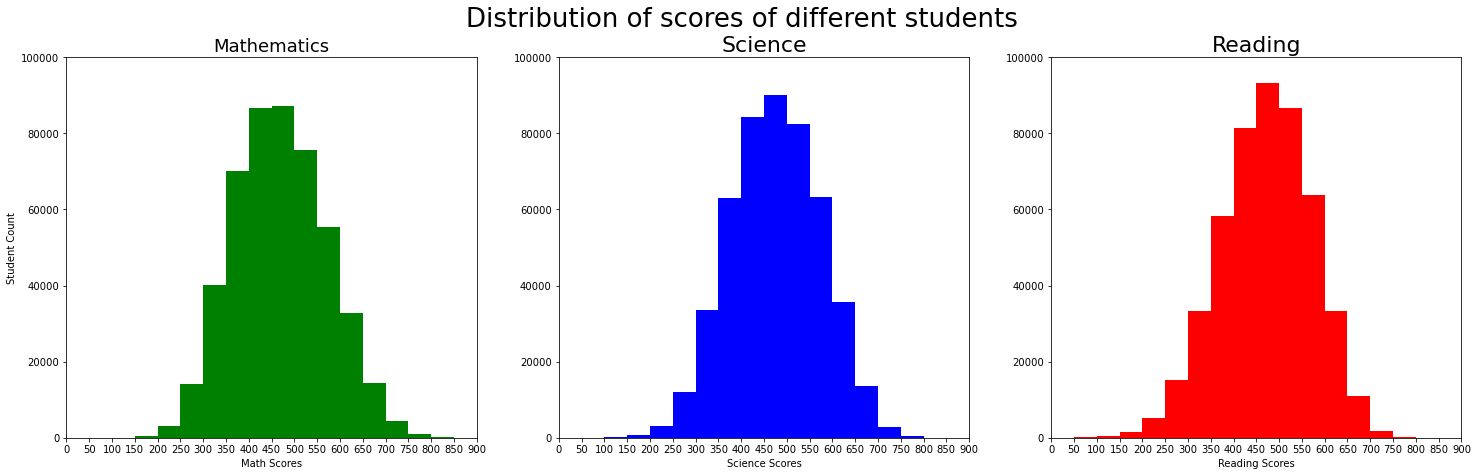

In [127]:
plt.figure(figsize = [25, 7])

bins_hist = np.arange(0, 900 + 1, 50)

# subplot 1/3
plt.subplot(1, 3, 3)
plt.hist(pisa_2012_clean['Reading'], bins = bins_hist, color='Red');

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Scores')
plt.title("Reading", fontsize=22);

# subplot 2/3
plt.subplot(1, 3, 2)
plt.hist(pisa_2012_clean['Science'], bins = bins_hist,color='Blue');

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)

plt.xlabel('Science Scores');
plt.title("Science", fontsize=22);


# subplot 3/3
plt.subplot(1, 3, 1)
plt.hist(pisa_2012_clean['Mathematics'], bins = bins_hist,color='Green');

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Scores');
plt.ylabel('Student Count')
plt.title("Mathematics", fontsize=18);


# set the overall title
plt.suptitle('Distribution of scores of different students', fontsize=26)
# save the output as png for further use
plt.savefig('univariate_barplot_totals.png')
plt.show()

Graph comments: 

* the score median between 300 and 600
* the sores are normally distributed 


##### Gender impact
does gender has an impact on the results?

In [129]:
# compute the mean scores and an overall mean
df_gender_comparison = pisa_2012_clean.groupby(['Gender'])[['Mathematics','Science','Reading']].mean().reset_index()

df_gender_comparison['All'] = (df_gender_comparison['Mathematics'] 
                          + df_gender_comparison['Science'] 
                          + df_gender_comparison['Reading']) / 3

In [130]:
# initiate the output dataframe
cols = ['Gender','Subject','Mean Score']
df_gender = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in df_gender_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

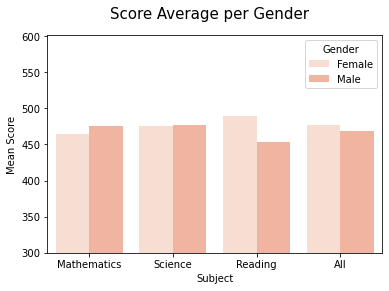

In [136]:
sns.barplot(x="Subject",y="Mean Score",hue="Gender",data=df_gender, palette=sns.color_palette("Reds"))

# set the overall title
plt.suptitle('Score Average per Gender', fontsize=15)
plt.ylim(300,600 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_gender.png')
plt.show()

there is a limited gender gap in all subjects excepts for Reading where females into reading more than males. 

##### internet access impact

In [137]:
# compute the mean scores and an overall mean
df_internet_comparison = pisa_2012_clean.groupby(['Internet Access'])[['Mathematics','Science','Reading']].mean().reset_index()
df_internet_comparison['All'] = (df_internet_comparison['Mathematics'] 
                          + df_internet_comparison['Science'] 
                          + df_internet_comparison['Reading']) / 3

In [138]:
# initiate the output dataframe
cols = ['Internet Access','Subject','Mean Score']
df_internet_access = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in df_internet_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_internet_access = df_internet_access.append({'Internet Access': row['Internet Access'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

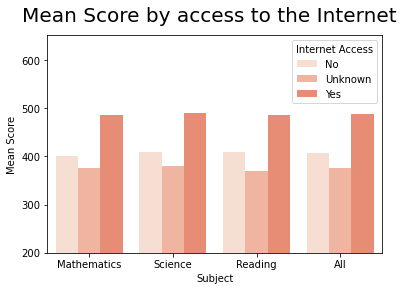

In [140]:
# visualizing the output 
sns.barplot(x="Subject",y="Mean Score",hue="Internet Access",data=df_internet_access, palette=sns.color_palette("Reds"))
# set the overall title
plt.suptitle('Mean Score by access to the Internet', fontsize=20)
plt.ylim(200, 650 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_internetaccess.png')
plt.show()

this is very clear the better internet access to the students, more grades they get on their exams.

## Conclusion

* We have found that the scores in each of the subjects seem to be normally distributed. The major part of the students gets a score between 300 and 600. There is no difference to see between the subjects (median values not significantly different).
    
* countries out of 10 in the top-10 country list are in Asia. The other 3 countries are European countries. China-Shanghai is in the top spot for all of the subjects and therefore also tops the overall rankings. The opposite is the case for Peru that ranks last in all of the categories.
    
* there is a limited gender gap in all subjects excepts for Reading where females into reading more than males.however, Male students seem to be slightly better in Mathematics though while for the subject Science it seems to be very balanced. The overall performance of female students still seems to be better than the one from male students._
  
* this is very clear the better internet access to the students, more grades they get on their exams.